In [72]:
#gerekli kütüphaneler import edildi.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#gerekli algoritma ve değerlendirme modelleri import edildi.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, precision_score, recall_score, f1_score, silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import mode

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [12]:
data = pd.read_csv(r'C:\Users\baris\Desktop\Online Payments.csv')

In [16]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [18]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [20]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [22]:
data.shape

(6362620, 11)

In [24]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [26]:
if data.isnull().values.any():
    print('Bu veri setinde bazı eksik değerler var')
    data.dropna(inplace=True)
    print('Shape : ', data.shape) 
else:
    print('Bu veri setinde eksik değer yok')

Bu veri setinde eksik değer yok


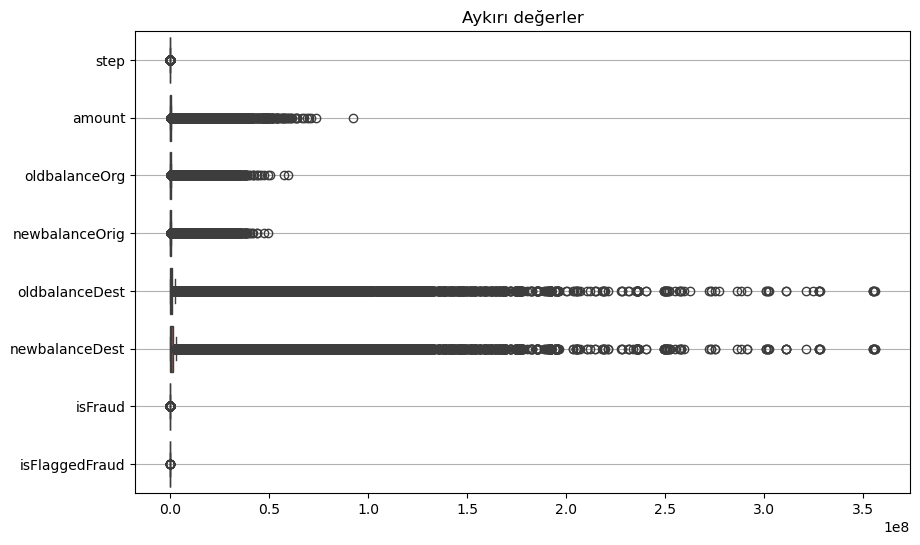

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h') 
plt.title('Aykırı değerler')
plt.grid(axis='y')
plt.show()

In [33]:
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type'])

In [36]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [38]:
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True) 
#gereksiz sütunları çıkarttık

In [40]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [42]:
data.corr(numeric_only=True)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006635,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.006635,1.000000,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833,0.002685
amount,0.022373,0.088419,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.339760,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.352758,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,-0.104679,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,-0.059364,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.020833,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.002685,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


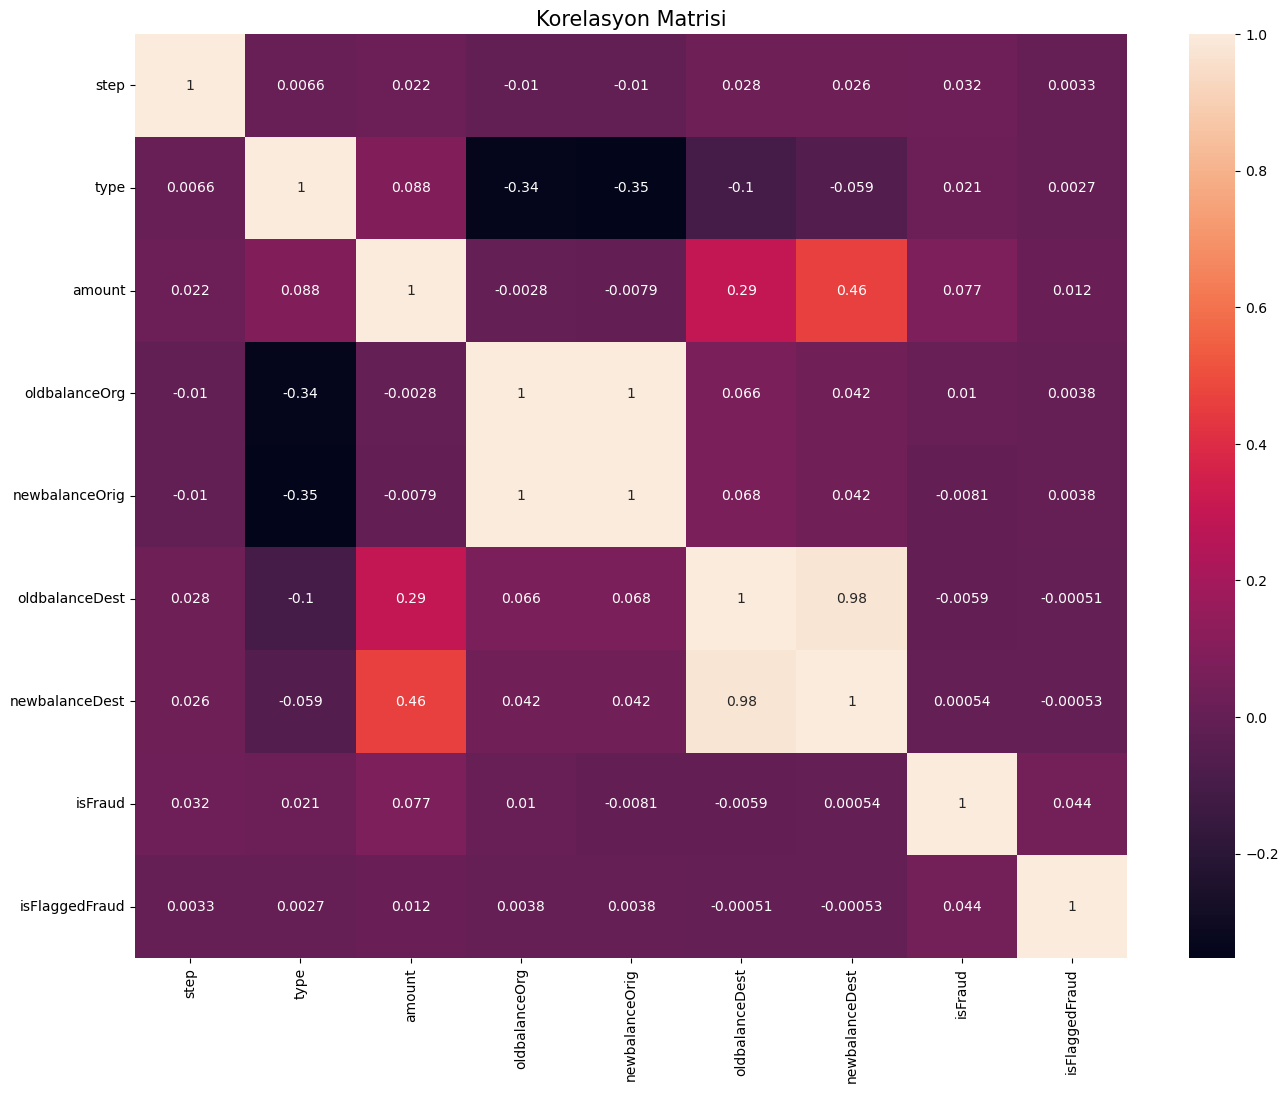

In [46]:
plt.figure(figsize=(16, 12))
corr=data.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.title('Korelasyon Matrisi', fontsize=15)
plt.show()

In [48]:
data.drop(['newbalanceOrig', 'oldbalanceDest'], axis=1, inplace=True)

In [50]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [55]:
#Verileri Test ve Eğitim Kümelerine Bölmek
x = data.drop(['isFraud'], axis=1)
y = data['isFraud']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

In [65]:
scaler = StandardScaler()
# Eğitim verisinin standartizasyonunu hesapla
scaler.fit(x_train)
# Standartize edilmiş eğitim ve test verilerini sakla
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [69]:
Model_DT = DecisionTreeClassifier()
Model_DT.fit(x_train_scaled, y_train)
y_pred_DT = Model_DT.predict(x_test_scaled)

# Quick evaluation
Train_Accuracy = Model_DT.score(x_train_scaled, y_train)
Test_Accuracy = Model_DT.score(x_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 100.00 %
Testing accuracy: 99.95 %


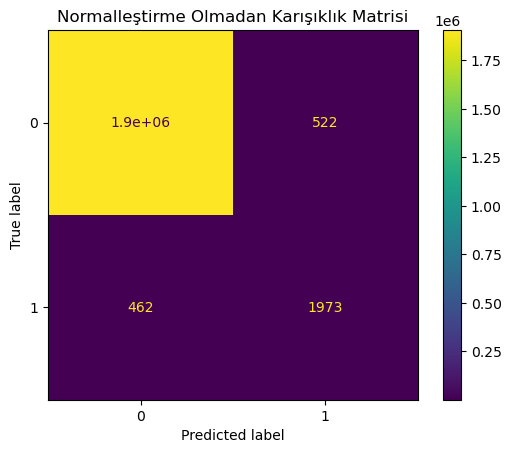

In [74]:
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_DT)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Normalleştirme Olmadan Karışıklık Matrisi')
plt.show()

In [76]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.79      0.81      0.80      2435

    accuracy                           1.00   1908786
   macro avg       0.90      0.90      0.90   1908786
weighted avg       1.00      1.00      1.00   1908786



In [80]:
Accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'➤➤➤ Accuracy Score : {Accuracy_DT * 100 : .2f} %\n')
Precision_DT = precision_score(y_test, y_pred_DT)
print(f'➤➤➤ Precision Score : {Precision_DT * 100 : .2f} %\n')
Recall_DT = recall_score(y_test, y_pred_DT)
print(f'➤➤➤ Recall Score : {Recall_DT * 100 : .2f} %\n')
F1_Score_DT = f1_score(y_test, y_pred_DT)
print(f'➤➤➤ F1 Score : {F1_Score_DT * 100 : .2f} %\n')


➤➤➤ Accuracy Score :  99.95 %

➤➤➤ Precision Score :  79.08 %

➤➤➤ Recall Score :  81.03 %

➤➤➤ F1 Score :  80.04 %



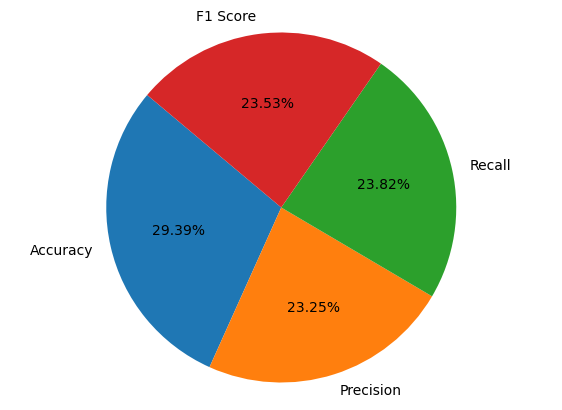

In [86]:
Scores = [Accuracy_DT, Precision_DT, Recall_DT, F1_Score_DT]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

In [90]:
Model_NB = GaussianNB()
Model_NB.fit(x_train_scaled, y_train)
y_pred_NB = Model_NB.predict(x_test_scaled)

# Quick evaluation
Train_Accuracy = Model_NB.score(x_train_scaled, y_train)
Test_Accuracy = Model_NB.score(x_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.62 %
Testing accuracy: 99.62 %


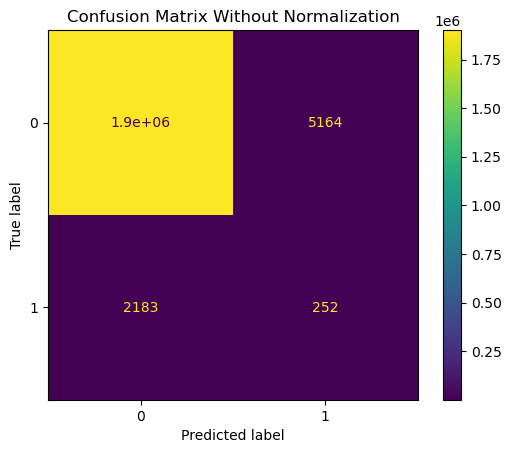

In [92]:
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_NB)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [94]:
print(classification_report(y_test, y_pred_NB))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.05      0.10      0.06      2435

    accuracy                           1.00   1908786
   macro avg       0.52      0.55      0.53   1908786
weighted avg       1.00      1.00      1.00   1908786



In [96]:
Accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f'➤➤➤ Accuracy Score : {Accuracy_NB * 100 : .2f} %\n')
Precision_NB = precision_score(y_test, y_pred_NB)
print(f'➤➤➤ Precision Score : {Precision_NB * 100 : .2f} %\n')
Recall_NB = recall_score(y_test, y_pred_NB)
print(f'➤➤➤ Recall Score : {Recall_NB * 100 : .2f} %\n')
F1_Score_NB = f1_score(y_test, y_pred_NB)
print(f'➤➤➤ F1 Score : {F1_Score_NB * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.62 %

➤➤➤ Precision Score :  4.65 %

➤➤➤ Recall Score :  10.35 %

➤➤➤ F1 Score :  6.42 %



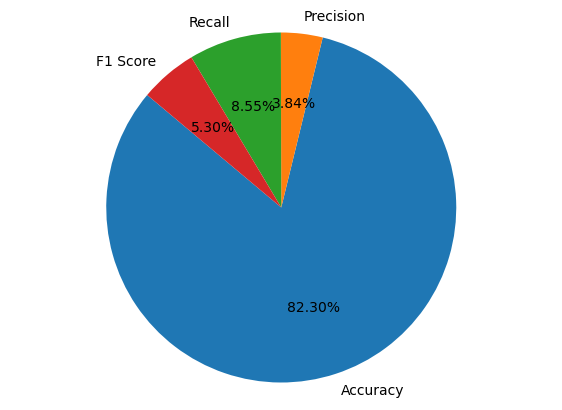

In [98]:
Scores = [Accuracy_NB, Precision_NB, Recall_NB, F1_Score_NB]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
evaluation = pd.DataFrame({'Model': ['Decision Tree', 'Naive Bayes'],
                           'Accuracy': [(Accuracy_LR*100), (Accuracy_DT*100), (Accuracy_NB*100)]})

evaluation